### Importación de Tensorflow

In [0]:
import tensorflow as tf #importamos tensorflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 1.x

### Importación de datos 

In [3]:
from tensorflow.examples.tutorials.mnist import input_data #importamos algun dataset de la libreria mnist
mnist = input_data.read_data_sets("input/data/", one_hot = True) #lee los datasets y retorna la codificacion con one hot, puede ser representacion binaria, etc.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting input/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting input/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

### verificando los datos de prueba

In [4]:
mnist.train.images.shape #obtiene todos las imagenes de entrenamiento, retorna la forma, #obtenemos 55000 imagenes de 28*28
#print(vars(mnist.train))
#print(mnist.train.labels)

(55000, 784)

In [0]:
#print(mnist.train.images[0])
imagendemo=np.reshape(mnist.train.images[30,:],(28,28)) #obtiene una de las imagenes
#print(mnist.train.images[24,:])

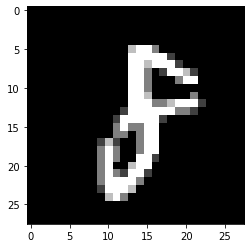

In [6]:
plt.imshow(imagendemo,cmap='gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) for row in img]))

In [8]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 191 255 255 128   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255  64   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 191 255 255 255  64   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 128   0  64 255 255 191  64   0   0

### Declarando la arquitectura

Generando función 

In [0]:
def Neural_network_model(
    n_nodes_hl1=500,
    n_nodes_hl2=500,
    n_nodes_hl3=500,
    n_classes=10
    ):
    
    
    # Declarando las entradas y salidas, lo definimos nosotros
    x=tf.placeholder('float',[None,784]) #aparta espacio para los datos que entraran, en este caso almacenara un float, 784 = dimension del vector(de la imagen)
    #None = tamaño del batch, el cual no sabemos de que tamaño es, pero sabemos que hay uno
    y=tf.placeholder('float') #guarda espacio para los datos(etiquetas) que saldran respecto a la entrada que se le da en cada iteracion
    
    # Declarando las variables 
    #parametro = para tensorflow el objeto Variable permitira hacer las modificaciones, es decir aquello que se puede modificar durante el entrenamiento
    #hiperparametro = Constante, todo aquello que nosotros modificamos antes del entrenamiento
    
    #Tamaño de las diferentes capas, 
    #weigths se inicializan aleatoriamente con una distribucion normal
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    #print(hidden_1_layer['weights'].shape)
    #print(hidden_1_layer['weights'])
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    #print(hidden_2_layer['weights'].shape)
    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    #print(hidden_3_layer['weights'].shape)
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    #print(output_layer['weights'].shape)
    
    # Declarando la arquitectura, conectando todo
    
    l1 = tf.add(tf.matmul(x,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']
    #para la salida no necesariamente se pone la función de activación
    
    # Declarando la funcion de costo y optimizador, 
    #error, entropia cruzada de logicos es una medida de distancia, 
    #reduce mean = promediara el error obtenido(gradiente estocastico medio)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) ) 
    ##Accuracy para está epoca
    correct = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(correct, 'float'))
    #logits = la salida que obtengo de la red, labels = las etiquetas obtenidas del mnist(lo que quiero)
    
    optimizer = tf.train.AdamOptimizer().minimize(cost)#AdamOptimizer minimizara el costo
    
    #retorna control a cada parametro
    return dict(
              x=x, #entradas
              y=y, #salidas
              output=output,#salida de la red
              cost=cost,#costo
              acc = acc, #accuracy
              optimizer=optimizer
              )

In [12]:
#Prueba del modelo
Neural_network_model()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



{'acc': <tf.Tensor 'Mean_1:0' shape=() dtype=float32>,
 'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'output': <tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>,
 'x': <tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>}

## función de entrenamiento  y prueba

In [0]:
loss = []
accuracy = []
def train_neural_network(DNN, hm_epochs=500,batch_size=100): #DNN =Diccionario de retorno de la funcion Neural network model
    with tf.Session() as sess: #se define el espacio de código que será compilado
        sess.run(tf.global_variables_initializer())#todas las variables globales son inicializadas con los valores que nosotros declaramos

        for epoch in range(hm_epochs):
            epoch_loss = 0 #error de la epoca
            for _ in range(int(mnist.train.num_examples/batch_size)):#for que toma el numero total de elementos entre el batch
                epoch_x, epoch_y = mnist.train.next_batch(batch_size) #epoch_x = valores de entrada del batch epoch_y = etiquetas del batch actual
                feed_dict={DNN["x"]: epoch_x, #carga las entradas actuales en las entradas de la arquitectura
                           DNN["y"]: epoch_y} #carga las etiquetas correspondientes de las entradas almacenadas en epoch_x
                _, c, prediction,y,acc   = sess.run([DNN["optimizer"], DNN["cost"] #todo lo retornado debe estar declarado en el diccionario de retorno de la arquitectura de la red
                                                 , DNN["output"], DNN["y"],DNN["acc"]], 
                                                feed_dict=feed_dict) #sessrun hace una lista de todo lo que deseo que retorne
                epoch_loss += c
            loss.append(epoch_loss)
            accuracy.append(acc)

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
        
        ## prueba con el conjunto de entrenamiento 
        
        #Prueba con datos nunca antes vistos  
        prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:mnist.test.images, DNN["y"]:mnist.test.labels})
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        precision = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy Test:',precision.eval())

In [21]:
DNN=Neural_network_model()
train_neural_network(DNN)

Epoch 0 completed out of 500 loss: 1685966.2828979492
Epoch 1 completed out of 500 loss: 398051.7062149048
Epoch 2 completed out of 500 loss: 220703.83944892883
Epoch 3 completed out of 500 loss: 127154.03533363342
Epoch 4 completed out of 500 loss: 77995.88271963596
Epoch 5 completed out of 500 loss: 51785.06711958707
Epoch 6 completed out of 500 loss: 34411.17641624811
Epoch 7 completed out of 500 loss: 21940.017706102954
Epoch 8 completed out of 500 loss: 20465.646859437227
Epoch 9 completed out of 500 loss: 17008.03360185027
Epoch 10 completed out of 500 loss: 17038.87833445236
Epoch 11 completed out of 500 loss: 14679.649186988472
Epoch 12 completed out of 500 loss: 15919.473353400826
Epoch 13 completed out of 500 loss: 10386.125020614449
Epoch 14 completed out of 500 loss: 12723.578028827906
Epoch 15 completed out of 500 loss: 13422.835015594901
Epoch 16 completed out of 500 loss: 9034.37449701567
Epoch 17 completed out of 500 loss: 10052.46014668894
Epoch 18 completed out of 500

# Gráfica de error#

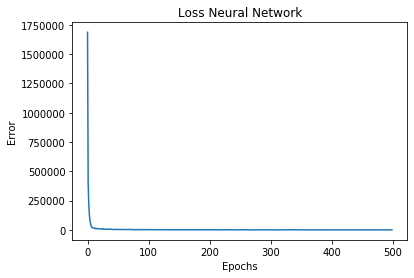

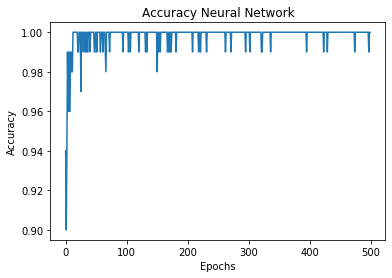

In [22]:
# Graph error
def graph_error(err_vector):

    plt.figure(0)
    plt.plot(err_vector)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Loss Neural Network')
    plt.show()
    
# Graph accuracy
def graph_accuracy(accuracy):
    plt.figure(0)
    plt.plot(accuracy)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Neural Network')
    plt.show()
graph_error(loss)
graph_accuracy(accuracy)